In [2]:
import xarray as xr
import fsspec

fs = fsspec.filesystem("")

In [3]:
fs.ls('gebco_2025_tid/')

['/Users/petermarsh/Documents/petes/weather_routing/dev/gebco_2025_tid/GEBCO_2025_TID.nc',
 '/Users/petermarsh/Documents/petes/weather_routing/dev/gebco_2025_tid/GEBCO_Grid_terms_of_use.pdf',
 '/Users/petermarsh/Documents/petes/weather_routing/dev/gebco_2025_tid/GEBCO_Grid_documentation.pdf']

In [34]:
ds = xr.open_dataset("gebco_2025/GEBCO_2025.nc")
land_mask = ds.elevation.where(ds.elevation >= 0)
land_binary = land_mask / land_mask
land_binary.to_dataset(name = 'lsm').to_netcdf("GEBCO_2025_land_mask.nc")

In [4]:
ds = xr.open_dataset("gebco_2025/GEBCO_2025.nc")

In [5]:
ds

<xarray.Dataset> Size: 7GB
Dimensions:    (lon: 86400, lat: 43200)
Coordinates:
  * lon        (lon) float64 691kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat        (lat) float64 346kB -90.0 -89.99 -89.99 ... 89.99 89.99 90.0
Data variables:
    crs        |S1 1B ...
    elevation  (lat, lon) int16 7GB ...
Attributes: (12/36)
    title:                           The GEBCO_2025 Grid - a continuous terra...
    summary:                         The GEBCO_2025 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/37c52e96-24ea-67ce-e063-708...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/37c52e96-24ea-67ce-e063-708...
    references:                      DOI: 10.5285/37c52e96-24ea-67ce-e063-708...
    node_offset:                     1.0

/Users/petermarsh/.local/share/mamba/envs/routing/lib/python3.10/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


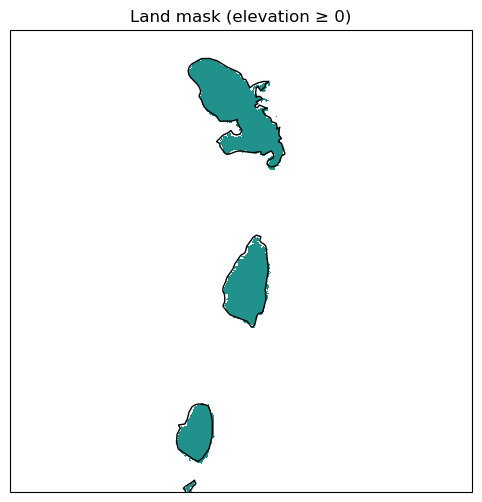

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# --- configuration ---
lat0, lon0 = 14.0, -61.0      # central point
dlat, dlon = 1.0, 1.0     # half-width of bounding box

# --- subset ---
ds_sel = ds.sel(
    lat=slice(lat0 - dlat, lat0 + dlat),
    lon=slice(lon0 - dlon, lon0 + dlon),
)

# land mask (1 over land, NaN elsewhere)
land_mask = ds_sel.elevation.where(ds_sel.elevation >= 0)
land_binary = land_mask / land_mask

# --- plot ---
proj = ccrs.PlateCarree()

fig, ax = plt.subplots(
    figsize=(8, 6),
    subplot_kw={"projection": proj},
)

land_binary.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
)

ax.coastlines()
ax.set_extent(
    [lon0 - dlon, lon0 + dlon, lat0 - dlat, lat0 + dlat],
    crs=ccrs.PlateCarree(),
)

ax.set_title("Land mask (elevation ≥ 0)")

plt.show()


In [13]:
fs.ls('../src/weather_router/data/')

['/Users/petermarsh/Documents/petes/weather_routing/dev/../src/weather_router/data/era5_land-sea-mask.nc']

In [21]:
ds = xr.open_dataset('/Users/petermarsh/Documents/petes/weather_routing/dev/../src/weather_router/data/era5_land-sea-mask.nc')

In [28]:
land_mask

<xarray.Dataset> Size: 53kB
Dimensions:    (longitude: 81, latitude: 81, time: 1)
Coordinates:
  * longitude  (longitude) float32 324B 289.0 289.2 289.5 ... 308.5 308.8 309.0
  * latitude   (latitude) float32 324B 24.0 23.75 23.5 23.25 ... 4.5 4.25 4.0
  * time       (time) datetime64[ns] 8B 2020-01-01
Data variables:
    lsm        (time, latitude, longitude) float64 52kB ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-01 12:42:22 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

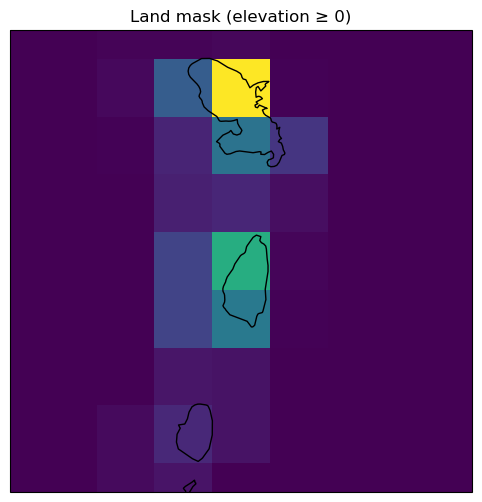

In [31]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# --- configuration ---
lat0, lon0 = 14.0, 360-61.0      # central point
dlat, dlon = 1.0, 1.0     # half-width of bounding box

# --- subset ---
land_binary = ds.sel(
    latitude=slice(lat0 + dlat, lat0 - dlat),
    longitude=slice(lon0 - dlon, lon0 + dlon),
).lsm

# land mask (1 over land, NaN elsewhere)
#land_mask = ds_sel.lsm.where(ds_sel.lsm > 0)
#land_binary = land_mask / land_mask

# --- plot ---
proj = ccrs.PlateCarree()

fig, ax = plt.subplots(
    figsize=(8, 6),
    subplot_kw={"projection": proj},
)

land_binary.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
)

ax.coastlines()
ax.set_extent(
    [lon0 - dlon, lon0 + dlon, lat0 - dlat, lat0 + dlat],
    crs=ccrs.PlateCarree(),
)

ax.set_title("Land mask (elevation ≥ 0)")

plt.show()

In [ ]:
ds_sel = ds.sel(lat = slice(14-50, 14+50), lon = slice(61-50, 61+50))

ds_land = ds_sel.elevation.where(ds_sel.elevation >= 0)

(ds_land/ds_land).plot()

KeyboardInterrupt: 

In [17]:
ds.tid

<xarray.DataArray 'tid' (lat: 43200, lon: 86400)> Size: 4GB
[3732480000 values with dtype=int8]
Coordinates:
  * lon      (lon) float64 691kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat      (lat) float64 346kB -90.0 -89.99 -89.99 -89.99 ... 89.99 89.99 90.0
Attributes:
    long_name:           GEBCO Type Identifier
    units:               1
    grid_mapping:        crs
    sdn_parameter_urn:   SDN:P01::GEBCOSRC
    sdn_parameter_name:  Source identifer of GEBCO grid cell data
    sdn_uom_urn:         SDN:P06:UUUU
    sdn_uom_name:        Dimensionless
    flag_values:         [ 0 10 11 12 13 14 15 16 17 40 41 42 43 44 45 46 47 ...
    flag_meanings:       Land Singlebeam Multibeam Seismic Isolated_sounding ...